In [74]:
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
from DeepPurpose import utils, dataset
from DeepPurpose import DTI as models
import warnings
warnings.filterwarnings("ignore")
import sklearn as sk

# Training a Drug Target Interaction model using Davis dataset


In [64]:
X_drugs, X_targets, y = dataset.load_process_DAVIS(path = './data', binary = False, convert_to_log = True, threshold = 30)
print('Drug 1: ' + X_drugs[0])
print('Target 1: ' + X_targets[0])
print('Score 1: ' + str(y[0]))

Beginning Processing...
100% [............................................................................] 179878 / 179878Beginning to extract zip file...
Default set to logspace (nM -> p) for easier regression
Done!
Drug 1: CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N
Target 1: MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELL

In [65]:
drug_encoding, target_encoding = 'MPNN', 'CNN'

In [80]:
#split data into training, validation and testing
train, val, test = utils.data_process(X_drugs, X_targets, y, 
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.7,0.1,0.2],
                                random_seed = 1)
train.head(5)

Drug Target Interaction Prediction Mode...
in total: 30056 drug-target pairs
encoding drug...
unique drugs: 68
encoding protein...
unique target sequence: 379
splitting dataset...
Done.


,SMILES,Target Sequence,Label,drug_encoding,target_encoding
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.0,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
1,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.0,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
2,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.0,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
3,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.0,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."
4,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.0,"[[[tensor(1.), tensor(0.), tensor(0.), tensor(...","[P, F, W, K, I, L, N, P, L, L, E, R, G, T, Y, ..."


In [67]:
#initialize model configurations
config = utils.generate_config(drug_encoding = drug_encoding, 
                         target_encoding = target_encoding, 
                         cls_hidden_dims = [1024,1024,512], 
                         train_epoch = 5, 
                         LR = 0.001, 
                         batch_size = 128,
                         hidden_dim_drug = 128,
                         mpnn_hidden_size = 128,
                         mpnn_depth = 3, 
                         cnn_target_filters = [32,64,96],
                         cnn_target_kernels = [4,8,12]
                        )
model = models.model_initialize(**config)


Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 30.5942. Total time 0.00055 hours
Training at Epoch 1 iteration 100 with loss 0.76280. Total time 0.04944 hours
Validation at Epoch 1 with loss:0.87926, MSE: 0.85192 , Pearson Correlation: 0.05838 with p-value: 1.36E-03 , Concordance Index: 0.55401
Training at Epoch 2 iteration 0 with loss 0.68702. Total time 0.08527 hours
Training at Epoch 2 iteration 100 with loss 0.58151. Total time 0.13305 hours
Validation at Epoch 2 with loss:0.97399, MSE: 0.73043 , Pearson Correlation: 0.33714 with p-value: 8.39E-81 , Concordance Index: 0.67201
Training at Epoch 3 iteration 0 with loss 1.08591. Total time 0.16916 hours
Training at Epoch 3 iteration 100 with loss 0.75681. Total time 0.21583 hours
Validation at Epoch 3 with loss:0.39150, MSE: 0.76639 , Pearson Correlation: 0.38416 with p-value: 2.62E-106 , Concordance Index: 0.69629
Training at Epoch 4 iteration 0 with loss 0.67176. Total tim

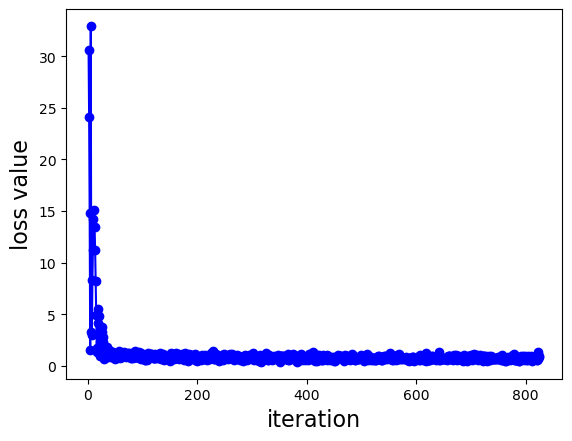

In [68]:
#model training
model.train(train, val, test)

In [96]:
model.save_model('models/my_trained_model')

In [83]:
#model testing
y_pred_1 = model.predict(test)

predicting...


In [94]:
test['Label'][1:10]

1    5.000000
2    5.000000
3    6.244125
4    8.060481
5    5.000000
6    5.000000
7    6.920819
8    5.000000
9    6.602060
Name: Label, dtype: float64

In [84]:
y_pred_1[1:10]

[5.272134780883789,
 5.212078094482422,
 5.303801536560059,
 5.828512191772461,
 5.362523078918457,
 5.500299453735352,
 5.760557174682617,
 5.125918388366699,
 5.441217422485352]

# Testing with pretrained model on the BindingDB dataset

In [85]:
#load pretrained model on BindingDB
model2 = models.model_pretrained('models/model_MPNN_CNN/')


In [86]:
#model testing
y_pred_2 = model2.predict(test)

predicting...


In [87]:
y_pred_2[1:10]

[2.485642433166504,
 8.05942153930664,
 2.3771371841430664,
 5.645474910736084,
 5.416153430938721,
 7.337442874908447,
 8.084798812866211,
 6.097911357879639,
 5.452602863311768]

# Compare the two results vs original labels

In [91]:
#Calculate mean squared error regression loss.

mse1 = sk.metrics.mean_squared_error(test['Label'], y_pred_1)
print('The mean square error for test set using the current trained model  is ' + str(mse1))

The mean square error for test set using the current trained model  is 0.7120917918900456


In [90]:
mse2 = sk.metrics.mean_squared_error(test['Label'], y_pred_2)
print('The mean square error for test set using the pretrained model is ' + str(mse2))

The mean square error for test set using the pretrained model is 4.844607623157411


In [99]:
if mse1<mse2:
    print("The model that is trained performs better")
else:
    print("The pretrained model performs better")
    

The model that is trained performs better
